## 1.importing dataset

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset
file_path = 'loans - loans.csv.csv'  # Replace with the actual path if needed
data = pd.read_csv(file_path)

print(data.head())


   ID  LOAN_ID  USER_ID CREATED_AT  AMOUNT_DISBURSED  AMOUNT_FEE  \
0   0  6669019  3392612   26/06/18              3100         432   
1   1  5699091   942534   11/05/18              5000         695   
2   2  5774993  3057207   15/05/18              1000         152   
3   3  6413412  1852716   14/06/18              5000         664   
4   4  5233927  2804658   19/04/18              3100         452   

   NUM_REPAYMENTS  DAYS_BTWN_REPAYMENTS  LOAN_TERM_DAYS LOAN_STATUS  \
0               4                     7              28      repaid   
1               1                    28              28      repaid   
2               4                     7              28      repaid   
3               4                     7              28      repaid   
4               1                    28              28      repaid   

  DISBURSED_AT  USER_LOAN_RANK PAID_IN_FULL_AT  CREDIT_SCORE  AMOUNT_REPAID  
0     26/06/18               4        15/07/18        0.8988           3532  
1     11

## 2.EDA

### 2.1 Information about the data type and size of file(includes ,rows and column)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   LOAN_ID               100000 non-null  int64  
 2   USER_ID               100000 non-null  int64  
 3   CREATED_AT            100000 non-null  object 
 4   AMOUNT_DISBURSED      100000 non-null  int64  
 5   AMOUNT_FEE            100000 non-null  int64  
 6   NUM_REPAYMENTS        100000 non-null  int64  
 7   DAYS_BTWN_REPAYMENTS  100000 non-null  int64  
 8   LOAN_TERM_DAYS        100000 non-null  int64  
 9   LOAN_STATUS           100000 non-null  object 
 10  DISBURSED_AT          100000 non-null  object 
 11  USER_LOAN_RANK        100000 non-null  int64  
 12  PAID_IN_FULL_AT       88865 non-null   object 
 13  CREDIT_SCORE          99998 non-null   float64
 14  AMOUNT_REPAID         100000 non-null  int64  
dtypes

### 2.2 Descriptive stats

##### Note:Includes duplicate user_ids

In [20]:
data.describe()

,ID,LOAN_ID,USER_ID,AMOUNT_DISBURSED,AMOUNT_FEE,NUM_REPAYMENTS,DAYS_BTWN_REPAYMENTS,LOAN_TERM_DAYS,USER_LOAN_RANK,CREDIT_SCORE,AMOUNT_REPAID
count,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99998.000000,100000.000000
mean,49999.500000,5.805305e+06,2.367583e+06,2789.978500,467.856540,3.867770,10.586800,31.539200,4.801550,0.803012,2970.055920
std,28867.657797,5.603639e+05,9.516037e+05,3698.400178,715.002378,1.797186,7.903056,11.638195,4.973165,0.110962,4325.232025
min,0.000000,4.832010e+06,4.620000e+02,250.000000,30.000000,1.000000,7.000000,28.000000,1.000000,0.416400,0.000000
25%,24999.750000,5.320310e+06,1.674448e+06,1000.000000,112.000000,4.000000,7.000000,28.000000,2.000000,0.787600,576.000000
50%,49999.500000,5.804250e+06,2.546821e+06,1000.000000,153.000000,4.000000,7.000000,28.000000,4.000000,0.844200,1153.000000
75%,74999.250000,6.290868e+06,3.149620e+06,4000.000000,540.000000,4.000000,7.000000,28.000000,6.000000,0.874000,3552.000000
max,99999.000000,7.280030e+06,3.840455e+06,60000.000000,10650.000000,24.000000,28.000000,420.000000,487.000000,0.968100,70650.000000


## 3. Preprocessing of data,

In [21]:
# Count duplicate values in LOAN_ID and USER_ID
duplicate_counts = {
    "LOAN_ID": data['LOAN_ID'].duplicated().sum(),
    "USER_ID": data['USER_ID'].duplicated().sum()
}

# Display the results
print("Number of duplicates in each column:")
for column, count in duplicate_counts.items():
    print(f"{column}: {count}")


Number of duplicates in each column:
LOAN_ID: 0
USER_ID: 27951


### 3.1 Datetime conversion,calculation of duration for which the loan is sanction

In [22]:
# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Remove leading/trailing spaces from string columns
string_columns = data.select_dtypes(include='object').columns
data[string_columns] = data[string_columns].apply(lambda col: col.str.strip())

# Convert the date columns to datetime format dd/mm/yy
date_columns = ['CREATED_AT', 'DISBURSED_AT', 'PAID_IN_FULL_AT']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], format='%d/%m/%y', errors='coerce')

# Calculate the "tenure of loan" in days (difference between PAID_IN_FULL_AT and DISBURSED_AT)
data['tenure of loan'] = (data['PAID_IN_FULL_AT'] - data['DISBURSED_AT']).dt.days

# If the loan is not paid (PAID_IN_FULL_AT is NaT), mark it as 'defaulted'
data['tenure of loan'] = data['tenure of loan'].fillna('defaulted')

# Format the date columns back to dd/mm/yy for consistency
for col in date_columns:
    data[col] = data[col].dt.strftime('%d/%m/%y')

# Display the resulting dataframe with the new 'tenure of loan' column
print(data[['CREATED_AT', 'DISBURSED_AT', 'PAID_IN_FULL_AT', 'tenure of loan']])

      CREATED_AT DISBURSED_AT PAID_IN_FULL_AT tenure of loan
0       26/06/18     26/06/18        15/07/18           19.0
1       11/05/18     11/05/18        07/06/18           27.0
2       15/05/18     15/05/18        12/06/18           28.0
3       14/06/18     14/06/18        25/06/18           11.0
4       19/04/18     19/04/18        04/07/18           76.0
...          ...          ...             ...            ...
99995   11/05/18     11/05/18        31/05/18           20.0
99996   24/06/18     24/06/18        26/06/18            2.0
99997   05/06/18     05/06/18        03/07/18           28.0
99998   29/05/18     30/05/18        02/06/18            3.0
99999   17/05/18     17/05/18        17/05/18            0.0

[100000 rows x 4 columns]


### 3.2 Checkpoint:Exporting Dataframe

In [23]:
# Remove duplicate USER_IDs, keeping the row with the maximum USER_LOAN_RANK
data = data.sort_values(by='USER_LOAN_RANK', ascending=False)  # Sort by USER_LOAN_RANK in descending order
data = data.drop_duplicates(subset='USER_ID', keep='first')  # Keep the first (max rank) entry for each USER_ID

# Reset the index for a clean DataFrame
data.reset_index(drop=True, inplace=True)

# Export the cleaned DataFrame to a CSV file
data.to_csv('cleaned_data.csv', index=False)  # Replace 'cleaned_data.csv' with your desired file path


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72049 entries, 0 to 72048
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    72049 non-null  int64  
 1   LOAN_ID               72049 non-null  int64  
 2   USER_ID               72049 non-null  int64  
 3   CREATED_AT            72049 non-null  object 
 4   AMOUNT_DISBURSED      72049 non-null  int64  
 5   AMOUNT_FEE            72049 non-null  int64  
 6   NUM_REPAYMENTS        72049 non-null  int64  
 7   DAYS_BTWN_REPAYMENTS  72049 non-null  int64  
 8   LOAN_TERM_DAYS        72049 non-null  int64  
 9   LOAN_STATUS           72049 non-null  object 
 10  DISBURSED_AT          72049 non-null  object 
 11  USER_LOAN_RANK        72049 non-null  int64  
 12  PAID_IN_FULL_AT       60914 non-null  object 
 13  CREDIT_SCORE          72047 non-null  float64
 14  AMOUNT_REPAID         72049 non-null  int64  
 15  tenure of loan     

In [25]:
data.describe()

,ID,LOAN_ID,USER_ID,AMOUNT_DISBURSED,AMOUNT_FEE,NUM_REPAYMENTS,DAYS_BTWN_REPAYMENTS,LOAN_TERM_DAYS,USER_LOAN_RANK,CREDIT_SCORE,AMOUNT_REPAID
count,72049.000000,7.204900e+04,7.204900e+04,72049.000000,72049.000000,72049.000000,72049.000000,72049.000000,72049.000000,72047.000000,72049.000000
mean,55953.395453,5.890959e+06,2.327820e+06,2699.448292,454.306083,3.870449,10.477508,31.490236,4.924732,0.800475,2751.202099
std,27798.900841,5.694617e+05,1.000733e+06,3831.078914,737.683563,1.803217,7.806117,12.156850,4.741205,0.111368,4438.358540
min,0.000000,4.832010e+06,4.620000e+02,250.000000,30.000000,1.000000,7.000000,28.000000,1.000000,0.416400,0.000000
25%,33905.000000,5.401337e+06,1.578384e+06,500.000000,76.000000,4.000000,7.000000,28.000000,2.000000,0.783900,576.000000
50%,58692.000000,5.943775e+06,2.499230e+06,1000.000000,152.000000,4.000000,7.000000,28.000000,4.000000,0.842500,1152.000000
75%,79647.000000,6.398677e+06,3.163256e+06,3100.000000,452.000000,4.000000,7.000000,28.000000,7.000000,0.872200,3532.000000
max,99999.000000,7.280030e+06,3.840455e+06,60000.000000,10650.000000,24.000000,28.000000,420.000000,487.000000,0.968100,70650.000000


## 4. Inferencial stats 

### 4.1 Summarising using random sampling  

#### 4.1.1 Skewness for loan tenure identified using Central Limit Theorem,visualised and quartile range identified

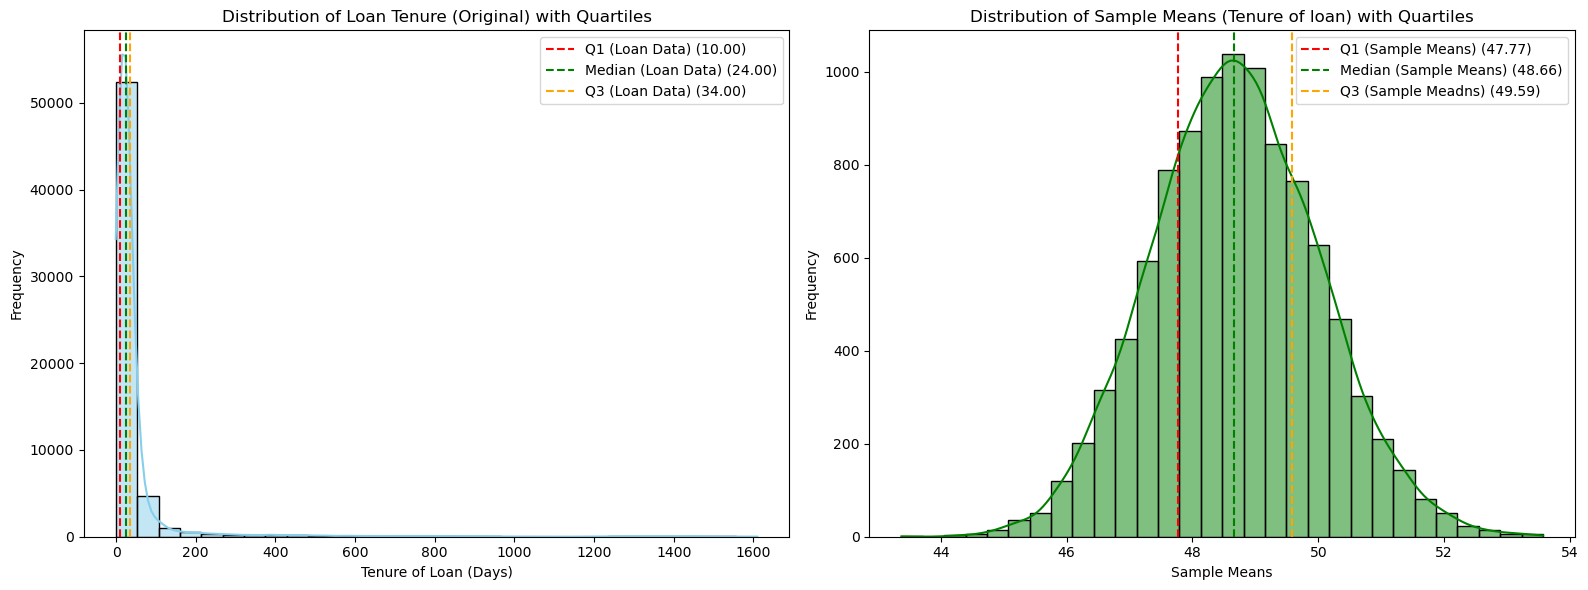

Q1 (25th percentile) for Loan Data: 10.00
Q2 (Median, 50th percentile) for Loan Data: 24.00
Q3 (75th percentile) for Loan Data: 34.00
Q1 (25th percentile) for Sample Means: 47.77
Q2 (Median, 50th percentile) for Sample Means: 48.66
Q3 (75th percentile) for Sample Means: 49.59


In [26]:
# Convert 'tenure of loan' to numeric values, in case it's not already
data['tenure of loan'] = pd.to_numeric(data['tenure of loan'], errors='coerce')

# Set the random sample size and number of repetitions
sample_size = 10000  # Sample size for each random sample
num_samples = 10000  # Number of random samples to draw

# Create a list to store the sample means
sample_means = []

# Take 10,000 random samples of size 10,000 and calculate their means
for _ in range(num_samples):
    sample = data['tenure of loan'].dropna().sample(n=sample_size, replace=True)  # Random sample with replacement
    sample_means.append(sample.mean())

# Convert sample means to a Pandas Series
sample_means = pd.Series(sample_means)

# Calculate quartiles for the original loan tenure distribution
Q1_loan = data['tenure of loan'].quantile(0.25)
Q2_loan = data['tenure of loan'].quantile(0.50)  # Median
Q3_loan = data['tenure of loan'].quantile(0.75)

# Calculate quartiles for the sample means (Central Limit Theorem)
Q1_sample_means = sample_means.quantile(0.25)
Q2_sample_means = sample_means.quantile(0.50)  # Median
Q3_sample_means = sample_means.quantile(0.75)

# Plotting the original distribution and sample means
plt.figure(figsize=(16, 6))

# Subplot 1: Original distribution (Tenure of Loan) with Quartiles
plt.subplot(1, 2, 1)
sns.histplot(data['tenure of loan'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.axvline(Q1_loan, color='red', linestyle='--', label=f'Q1 (Loan Data) ({Q1_loan:.2f})')
plt.axvline(Q2_loan, color='green', linestyle='--', label=f'Median (Loan Data) ({Q2_loan:.2f})')
plt.axvline(Q3_loan, color='orange', linestyle='--', label=f'Q3 (Loan Data) ({Q3_loan:.2f})')
plt.title('Distribution of Loan Tenure (Original) with Quartiles')
plt.xlabel('Tenure of Loan (Days)')
plt.ylabel('Frequency')
plt.legend()

# Subplot 2: Distribution of Sample Means (Central Limit Theorem) with Quartiles
plt.subplot(1, 2, 2)
sns.histplot(sample_means, kde=True, bins=30, color='green', edgecolor='black')
plt.axvline(Q1_sample_means, color='red', linestyle='--', label=f'Q1 (Sample Means) ({Q1_sample_means:.2f})')
plt.axvline(Q2_sample_means, color='green', linestyle='--', label=f'Median (Sample Means) ({Q2_sample_means:.2f})')
plt.axvline(Q3_sample_means, color='orange', linestyle='--', label=f'Q3 (Sample Meadns) ({Q3_sample_means:.2f})')
plt.title('Distribution of Sample Means (Tenure of loan) with Quartiles')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Print the quartiles for reference
print(f"Q1 (25th percentile) for Loan Data: {Q1_loan:.2f}")
print(f"Q2 (Median, 50th percentile) for Loan Data: {Q2_loan:.2f}")
print(f"Q3 (75th percentile) for Loan Data: {Q3_loan:.2f}")
print(f"Q1 (25th percentile) for Sample Means: {Q1_sample_means:.2f}")
print(f"Q2 (Median, 50th percentile) for Sample Means: {Q2_sample_means:.2f}")
print(f"Q3 (75th percentile) for Sample Means: {Q3_sample_means:.2f}")

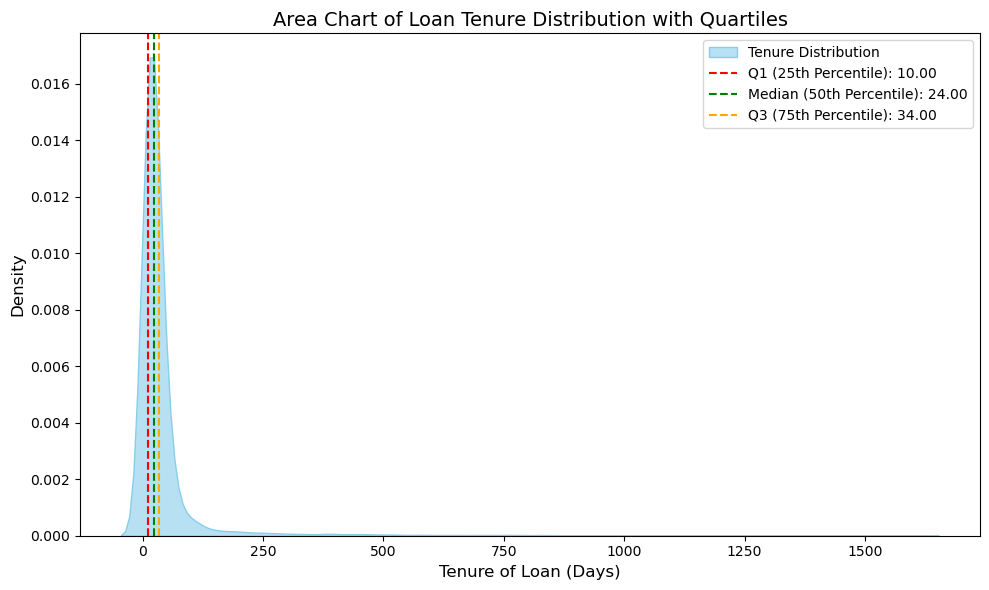

Q1 (25th percentile) for Loan Data: 10.00
Q2 (Median, 50th percentile) for Loan Data: 24.00
Q3 (75th percentile) for Loan Data: 34.00


In [27]:
# Convert 'tenure of loan' to numeric values, in case it's not already
data['tenure of loan'] = pd.to_numeric(data['tenure of loan'], errors='coerce')

# Drop missing values for plotting
tenure_data = data['tenure of loan'].dropna()

# Calculate quartiles for the original loan tenure distribution
Q1_loan = tenure_data.quantile(0.25)
Q2_loan = tenure_data.quantile(0.50)  # Median
Q3_loan = tenure_data.quantile(0.75)

# Create the area chart using a kernel density estimate (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(tenure_data, fill=True, color='skyblue', alpha=0.6, label='Tenure Distribution')

# Add vertical lines for quartiles
plt.axvline(Q1_loan, color='red', linestyle='--', label=f'Q1 (25th Percentile): {Q1_loan:.2f}')
plt.axvline(Q2_loan, color='green', linestyle='--', label=f'Median (50th Percentile): {Q2_loan:.2f}')
plt.axvline(Q3_loan, color='orange', linestyle='--', label=f'Q3 (75th Percentile): {Q3_loan:.2f}')

# Set titles and labels
plt.title('Area Chart of Loan Tenure Distribution with Quartiles', fontsize=14)
plt.xlabel('Tenure of Loan (Days)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the quartiles for reference
print(f"Q1 (25th percentile) for Loan Data: {Q1_loan:.2f}")
print(f"Q2 (Median, 50th percentile) for Loan Data: {Q2_loan:.2f}")
print(f"Q3 (75th percentile) for Loan Data: {Q3_loan:.2f}")

In [28]:
data.describe()

,ID,LOAN_ID,USER_ID,AMOUNT_DISBURSED,AMOUNT_FEE,NUM_REPAYMENTS,DAYS_BTWN_REPAYMENTS,LOAN_TERM_DAYS,USER_LOAN_RANK,CREDIT_SCORE,AMOUNT_REPAID,tenure of loan
count,72049.000000,7.204900e+04,7.204900e+04,72049.000000,72049.000000,72049.000000,72049.000000,72049.000000,72049.000000,72047.000000,72049.000000,60914.000000
mean,55953.395453,5.890959e+06,2.327820e+06,2699.448292,454.306083,3.870449,10.477508,31.490236,4.924732,0.800475,2751.202099,48.701891
std,27798.900841,5.694617e+05,1.000733e+06,3831.078914,737.683563,1.803217,7.806117,12.156850,4.741205,0.111368,4438.358540,132.848994
min,0.000000,4.832010e+06,4.620000e+02,250.000000,30.000000,1.000000,7.000000,28.000000,1.000000,0.416400,0.000000,-1.000000
25%,33905.000000,5.401337e+06,1.578384e+06,500.000000,76.000000,4.000000,7.000000,28.000000,2.000000,0.783900,576.000000,10.000000
50%,58692.000000,5.943775e+06,2.499230e+06,1000.000000,152.000000,4.000000,7.000000,28.000000,4.000000,0.842500,1152.000000,24.000000
75%,79647.000000,6.398677e+06,3.163256e+06,3100.000000,452.000000,4.000000,7.000000,28.000000,7.000000,0.872200,3532.000000,34.000000
max,99999.000000,7.280030e+06,3.840455e+06,60000.000000,10650.000000,24.000000,28.000000,420.000000,487.000000,0.968100,70650.000000,1610.000000


#### 4.1.2 Skewness for amount disbursed identified using Central Limit Theorem,visualised and quartile range identified

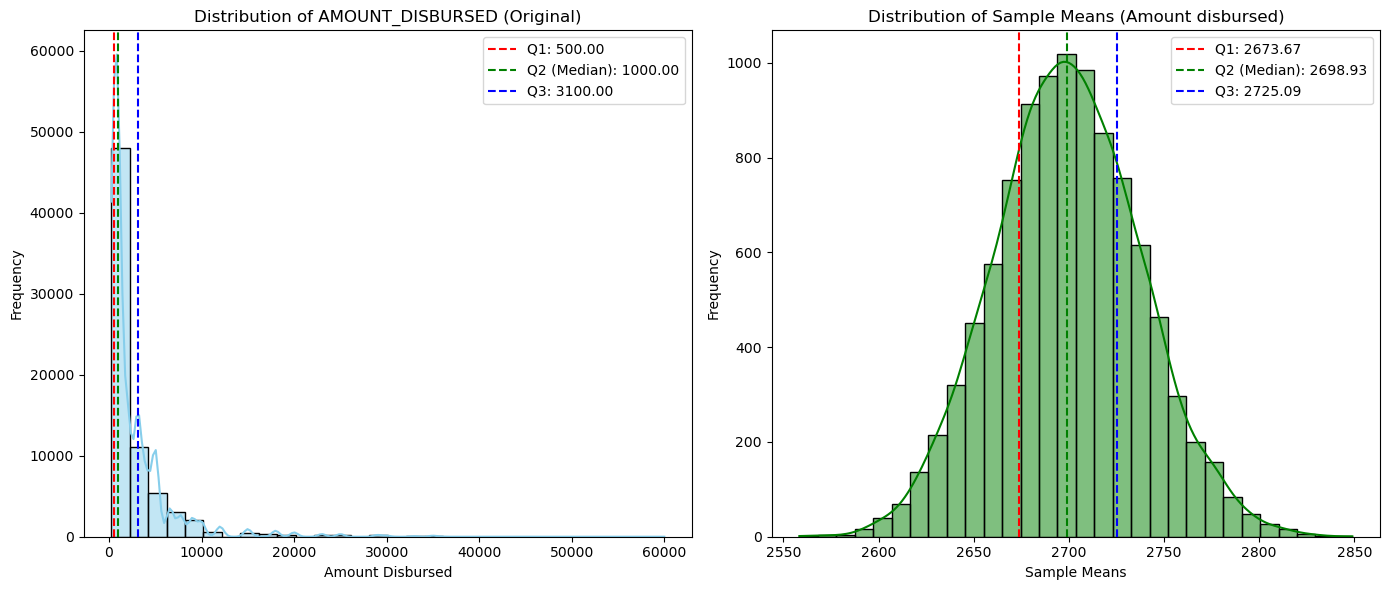

Mean of Sample Means: 2699.37


In [29]:
# Extract the 'AMOUNT_DISBURSED' column
amount_disbursed = data['AMOUNT_DISBURSED']

# Set the random sample size and number of repetitions
sample_size = 10000
num_samples = 10000

# Create a list to store the sample means
sample_means = []

# Take 10000 random samples of size 10000 and calculate their means
for _ in range(num_samples):
    sample = amount_disbursed.sample(n=sample_size, replace=True)  # Random sample with replacement
    sample_means.append(sample.mean())

# Convert sample means to a Pandas Series
sample_means = pd.Series(sample_means)

# Calculate quartiles for original data and sample means
Q1_original = amount_disbursed.quantile(0.25)
Q2_original = amount_disbursed.quantile(0.50)
Q3_original = amount_disbursed.quantile(0.75)

Q1_sample_means = sample_means.quantile(0.25)
Q2_sample_means = sample_means.quantile(0.50)
Q3_sample_means = sample_means.quantile(0.75)

# Plot the original distribution (histogram)
plt.figure(figsize=(14, 6))

# Subplot 1: Original distribution
plt.subplot(1, 2, 1)
sns.histplot(amount_disbursed, kde=True, bins=30, color='skyblue', edgecolor='black')
plt.axvline(Q1_original, color='red', linestyle='--', label=f'Q1: {Q1_original:.2f}')
plt.axvline(Q2_original, color='green', linestyle='--', label=f'Q2 (Median): {Q2_original:.2f}')
plt.axvline(Q3_original, color='blue', linestyle='--', label=f'Q3: {Q3_original:.2f}')
plt.title('Distribution of AMOUNT_DISBURSED (Original)')
plt.xlabel('Amount Disbursed')
plt.ylabel('Frequency')
plt.legend()

# Subplot 2: Distribution of sample means (Central Limit Theorem)
plt.subplot(1, 2, 2)
sns.histplot(sample_means, kde=True, bins=30, color='green', edgecolor='black')
plt.axvline(Q1_sample_means, color='red', linestyle='--', label=f'Q1: {Q1_sample_means:.2f}')
plt.axvline(Q2_sample_means, color='green', linestyle='--', label=f'Q2 (Median): {Q2_sample_means:.2f}')
plt.axvline(Q3_sample_means, color='blue', linestyle='--', label=f'Q3: {Q3_sample_means:.2f}')
plt.title('Distribution of Sample Means (Amount disbursed)')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Calculate and print the mean of the sample means
mean_of_sample_means = sample_means.mean()
print(f"Mean of Sample Means: {mean_of_sample_means:.2f}")


### 4.2 Summarising using random sampling  (excluding duplicates)

#### 4.2.1 Seprating datasets in Segment 1 and Segment 2 

#### 4.2.1.1 Segment 1:Users with user ids having loans == 1 

In [31]:
# Filter rows where USER_LOAN_RANK is 1
seg1 = data[data['USER_LOAN_RANK'] == 1]
# Optionally, save the filtered DataFrame to a CSV file
seg1.to_csv('onetime_user.csv', index=False)

#### 4.2.1.2 Segment 2:Users with user ids having loans == 1 

In [32]:
seg2 = data[data['USER_LOAN_RANK'] > 1]
seg2.to_csv('repeat_user.csv', index=False)

### 4.2.2 Analysis on Segment 1


In [33]:
# Remove duplicate USER_IDs, keeping the row with the maximum USER_LOAN_RANK
data = seg1.sort_values(by='USER_LOAN_RANK', ascending=False)  # Sort by USER_LOAN_RANK in descending order
seg1 = data.drop_duplicates(subset='USER_ID', keep='first')  # Keep the first (max rank) entry for each USER_ID

# Reset the index for a clean DataFrame
seg1.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame

###### Note: EDA

In [34]:
seg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15684 entries, 0 to 15683
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    15684 non-null  int64  
 1   LOAN_ID               15684 non-null  int64  
 2   USER_ID               15684 non-null  int64  
 3   CREATED_AT            15684 non-null  object 
 4   AMOUNT_DISBURSED      15684 non-null  int64  
 5   AMOUNT_FEE            15684 non-null  int64  
 6   NUM_REPAYMENTS        15684 non-null  int64  
 7   DAYS_BTWN_REPAYMENTS  15684 non-null  int64  
 8   LOAN_TERM_DAYS        15684 non-null  int64  
 9   LOAN_STATUS           15684 non-null  object 
 10  DISBURSED_AT          15684 non-null  object 
 11  USER_LOAN_RANK        15684 non-null  int64  
 12  PAID_IN_FULL_AT       12118 non-null  object 
 13  CREDIT_SCORE          15684 non-null  float64
 14  AMOUNT_REPAID         15684 non-null  int64  
 15  tenure of loan     

In [35]:
seg1.describe()

,ID,LOAN_ID,USER_ID,AMOUNT_DISBURSED,AMOUNT_FEE,NUM_REPAYMENTS,DAYS_BTWN_REPAYMENTS,LOAN_TERM_DAYS,USER_LOAN_RANK,CREDIT_SCORE,AMOUNT_REPAID,tenure of loan
count,15684.000000,1.568400e+04,1.568400e+04,15684.000000,15684.000000,15684.000000,15684.000000,15684.0,15684.0,15684.000000,15684.000000,12118.000000
mean,53491.488268,5.844837e+06,3.077219e+06,607.131472,92.354501,3.831676,8.178271,28.0,1.0,0.611824,531.962701,56.498185
std,28344.008907,5.773081e+05,8.046970e+05,325.457104,50.635907,0.690413,4.832893,0.0,0.0,0.077333,422.216265,159.549560
min,8.000000,4.832010e+06,2.920000e+03,250.000000,30.000000,1.000000,7.000000,28.0,1.0,0.416400,0.000000,0.000000
25%,30156.500000,5.333542e+06,2.999605e+06,250.000000,38.000000,4.000000,7.000000,28.0,1.0,0.552900,288.000000,6.000000
50%,55252.000000,5.846344e+06,3.287792e+06,500.000000,76.000000,4.000000,7.000000,28.0,1.0,0.601800,545.000000,19.000000
75%,77855.250000,6.398002e+06,3.576600e+06,1000.000000,152.000000,4.000000,7.000000,28.0,1.0,0.660725,1112.000000,32.000000
max,99996.000000,6.774149e+06,3.840455e+06,2000.000000,298.000000,4.000000,28.000000,28.0,1.0,0.901900,2956.000000,1610.000000


##### Exhibit 4.2.2.1Q. How many firstime customers paid on the same day of having the loan issued?


In [36]:
#This can not happen because you can not pay the loan without first getting it disbursed
seg1['tenure of loan'].min()

0.0

In [37]:
# Count the number of rows where 'tenure of loan' equals 0
count_tenure_zero = seg1[seg1['tenure of loan'] == 0].shape[0]

print(f"Number of people with a tenure of loan equal to 0: {count_tenure_zero} implying they payed on the same day")


Number of people with a tenure of loan equal to 0: 574 implying they payed on the same day


##### Exhibit 4.2.2.2 Q.How many loans are defaulted by onetime users and what is their  credit history?

In [39]:
# Count the total number of one-time customers
seg1_total = seg1.shape[0]

# Filter the rows where LOAN_STATUS is 'defaulted' for one-time customers
seg1_defaulted = seg1[seg1['LOAN_STATUS'] == 'defaulted']

# Count the number of defaulted loans
num_defaulted = seg1_defaulted.shape[0]
print(f"Number of defaulted loans from once repeat customers: {num_defaulted} among {seg1_total}")

Number of defaulted loans from once repeat customers: 3566 among 15684


##### Exhibit 4.2.2.3 Visual Defaulters vs non defaulters among one time users

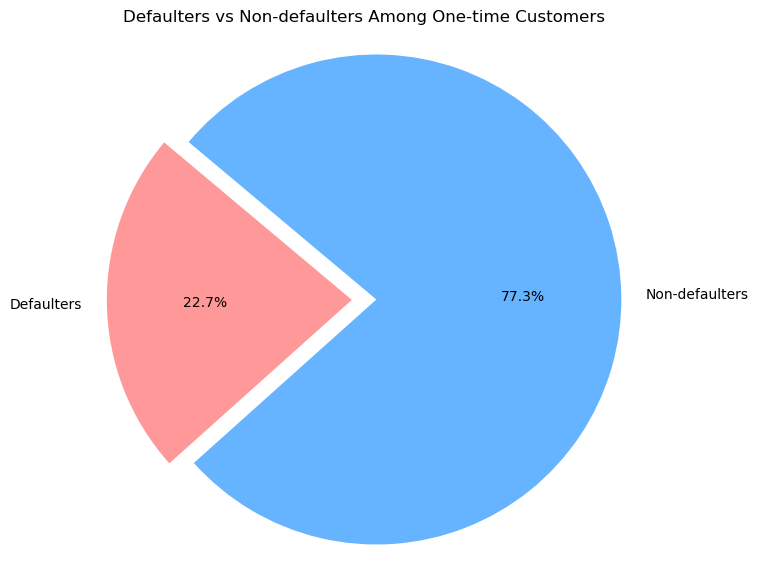

In [40]:

# Count how many one-time customers are defaulters
seg1_defaulted = seg1[seg1['LOAN_STATUS'] == 'defaulted'].shape[0]

# Pie chart: Defaulters vs non-defaulters among one-time customers
labels = ['Defaulters', 'Non-defaulters']
sizes = [seg1_defaulted, seg1_total - seg1_defaulted]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the defaulter slice

# Plotting the pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Defaulters vs Non-defaulters Among One-time Customers')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


##### Exhibit 4.2.2.4 How many defaults are registered by each loan term structure?

In [73]:
# Group by the loan term days and count the number of defaulters in each group for repeat customers
loan_term_defaults_seg1 = seg1[seg1['LOAN_STATUS'] == 'defaulted'].groupby('LOAN_TERM_DAYS').size()

# Calculate the total number of repeat users
total_repeat_users = seg1['USER_ID'].nunique()

# Calculate the percentage of defaults in each category with respect to total repeat users
defaults_percentage_seg1 = (loan_term_defaults_seg1 / total_repeat_users) * 100

# Print the result
print(defaults_percentage_seg1)


LOAN_TERM_DAYS
28    22.736547
dtype: float64


##### Exhibit 4.2.2.5 Q.what is the  credit history of onetime users who are defaulters ?

In [42]:
defaulters = seg1[seg1['LOAN_STATUS'] == 'defaulted']
# Create a new DataFrame that stores the credit scores of the defaulters
defaulters_credit_scores = defaulters[['USER_ID', 'CREDIT_SCORE']]
defaulters_credit_scores.describe()

,USER_ID,CREDIT_SCORE
count,3.566000e+03,3566.000000
mean,3.127769e+06,0.590973
std,6.836105e+05,0.068610
min,6.681000e+03,0.416400
25%,3.018852e+06,0.538625
50%,3.250011e+06,0.584450
75%,3.536419e+06,0.634600
max,3.839908e+06,0.845800


##### Credit history of one time users

In [43]:
seg1['CREDIT_SCORE'].describe()
# Calculate descriptive statistics

count    15684.000000
mean         0.611824
std          0.077333
min          0.416400
25%          0.552900
50%          0.601800
75%          0.660725
max          0.901900
Name: CREDIT_SCORE, dtype: float64

##### Frequency distribution of credit scores for one time user

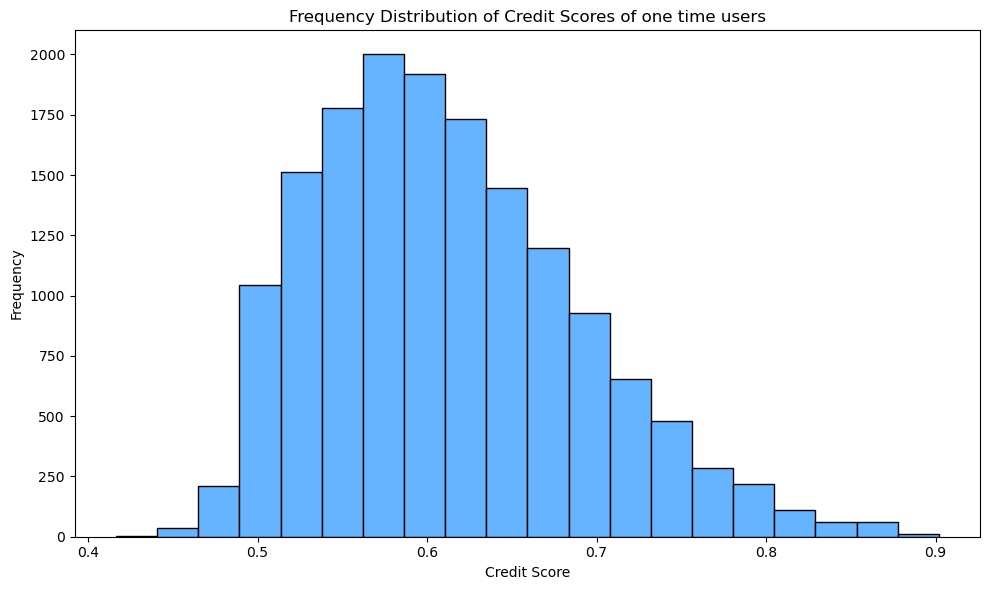

In [44]:
# Create a frequency distribution of the credit scores
plt.figure(figsize=(10,6))
plt.hist(seg1['CREDIT_SCORE'], bins=20, color='#66b3ff', edgecolor='black')

# Labeling the plot
plt.title('Frequency Distribution of Credit Scores of one time users')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
defaulters['CREDIT_SCORE'].describe()


count    3566.000000
mean        0.590973
std         0.068610
min         0.416400
25%         0.538625
50%         0.584450
75%         0.634600
max         0.845800
Name: CREDIT_SCORE, dtype: float64

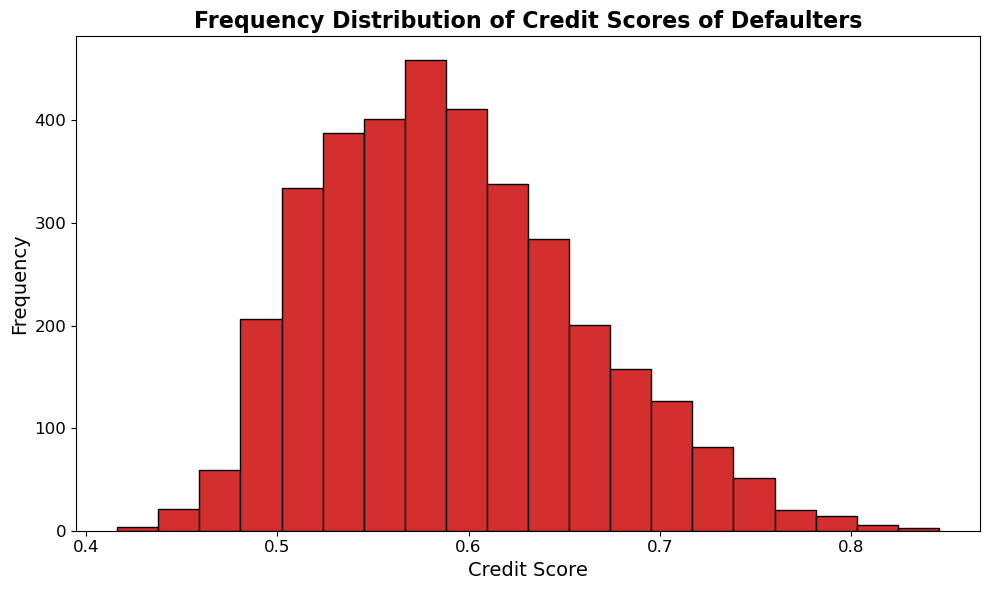

In [46]:
# Create a frequency distribution of the credit scores with a red color scheme
plt.figure(figsize=(10, 6))
plt.hist(defaulters_credit_scores['CREDIT_SCORE'], bins=20, color='#D32F2F', edgecolor='black')  # Red color

# Labeling the plot with improved professional look
plt.title('Frequency Distribution of Credit Scores of Defaulters', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the appearance of ticks and labels for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Apply a tight layout
plt.tight_layout()

# Show the plot
plt.show()


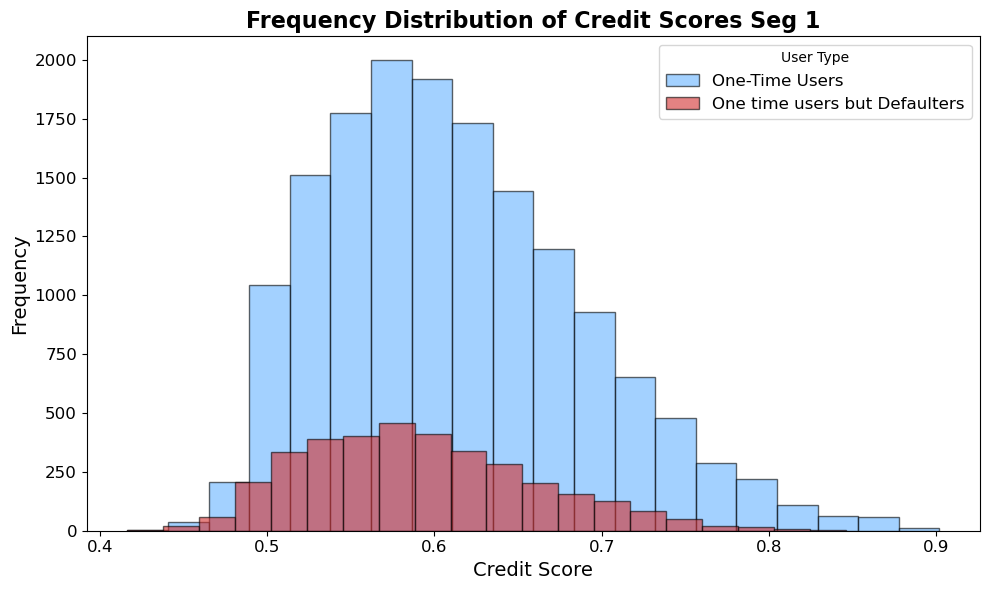

In [47]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency distribution of the credit scores for one-time users
plt.hist(seg1['CREDIT_SCORE'], bins=20, color='#66b3ff', edgecolor='black', alpha=0.6, label='One-Time Users')

# Plot the frequency distribution of the credit scores for defaulters with a red color scheme
plt.hist(defaulters_credit_scores['CREDIT_SCORE'], bins=20, color='#D32F2F', edgecolor='black', alpha=0.6, label='One time users but Defaulters')

# Labeling the plot
plt.title('Frequency Distribution of Credit Scores Seg 1', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the appearance of ticks and labels for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend to differentiate between the two categories
plt.legend(title='User Type', fontsize=12)

# Apply a tight layout
plt.tight_layout()

# Show the plot
plt.show()


##### Q How many one time users paid the loan on time ?


###### Excluding defaulter's unique id as a one time loan number

In [124]:
# Filter for one-time users who did not default
one_time_users_non_defaulted = seg1[(seg1['LOAN_STATUS'] != 'defaulted')]

# Check for one-time users who paid the loan on time (tenure of loan <= loan term days)
on_time_users = one_time_users_non_defaulted[one_time_users_non_defaulted['tenure of loan'] <= one_time_users_non_defaulted['LOAN_TERM_DAYS']]

# Calculate the number of one-time users
total_one_time_users = one_time_users_non_defaulted['USER_ID'].nunique()

# Calculate the number of users who paid on time
on_time_users_count = on_time_users['USER_ID'].nunique()

# Calculate the percentage of users who paid the loan on time
on_time_percentage = (on_time_users_count / total_one_time_users) * 100

# Print the result
print(f"Percentage of one-time users who paid the loan on time: {on_time_percentage:.2f}%")


Percentage of one-time users who paid the loan on time: 70.97%


### 4.2.3 Analysis on Segment 2


In [129]:
file_path = 'repeat_user.csv'  # Replace with the actual path if needed
seg2 = pd.read_csv(file_path)
seg2.head()

,ID,LOAN_ID,USER_ID,CREATED_AT,AMOUNT_DISBURSED,AMOUNT_FEE,NUM_REPAYMENTS,DAYS_BTWN_REPAYMENTS,LOAN_TERM_DAYS,LOAN_STATUS,DISBURSED_AT,USER_LOAN_RANK,PAID_IN_FULL_AT,CREDIT_SCORE,AMOUNT_REPAID,tenure of loan
0,99877,6348559,271656,11/06/18,1000,152,4,7,28,repaid,11/06/18,487,11/06/18,0.7832,1152,0.0
1,99750,5495388,907948,02/05/18,1000,152,4,7,28,repaid,02/05/18,74,29/05/18,0.8116,1152,27.0
2,58299,6011926,1208013,26/05/18,5000,664,4,7,28,repaid,26/05/18,60,29/05/18,0.8343,5664,3.0
3,67093,6169666,582850,03/06/18,1000,153,1,28,28,repaid,03/06/18,54,14/07/18,0.7992,1153,41.0
4,13015,6129061,1696231,01/06/18,15000,2592,8,7,56,repaid,01/06/18,53,01/07/18,0.8168,17592,30.0


###### Note: EDA

In [130]:
seg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56365 entries, 0 to 56364
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    56365 non-null  int64  
 1   LOAN_ID               56365 non-null  int64  
 2   USER_ID               56365 non-null  int64  
 3   CREATED_AT            56365 non-null  object 
 4   AMOUNT_DISBURSED      56365 non-null  int64  
 5   AMOUNT_FEE            56365 non-null  int64  
 6   NUM_REPAYMENTS        56365 non-null  int64  
 7   DAYS_BTWN_REPAYMENTS  56365 non-null  int64  
 8   LOAN_TERM_DAYS        56365 non-null  int64  
 9   LOAN_STATUS           56365 non-null  object 
 10  DISBURSED_AT          56365 non-null  object 
 11  USER_LOAN_RANK        56365 non-null  int64  
 12  PAID_IN_FULL_AT       48796 non-null  object 
 13  CREDIT_SCORE          56363 non-null  float64
 14  AMOUNT_REPAID         56365 non-null  int64  
 15  tenure of loan     

In [69]:
seg2.describe()

,ID,LOAN_ID,USER_ID,AMOUNT_DISBURSED,AMOUNT_FEE,NUM_REPAYMENTS,DAYS_BTWN_REPAYMENTS,LOAN_TERM_DAYS,USER_LOAN_RANK,CREDIT_SCORE,AMOUNT_REPAID,tenure of loan
count,56365.000000,5.636500e+04,5.636500e+04,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56363.000000,56365.000000,48796.000000
mean,56638.440291,5.903793e+06,2.119293e+06,3281.651734,555.021929,3.881238,11.117289,32.461421,6.016819,0.852970,3368.722736,46.765759
std,27606.545614,5.665969e+05,9.487925e+05,4144.231993,805.163981,2.005798,8.337400,13.586030,4.822364,0.039128,4835.198086,125.266322
min,0.000000,4.833149e+06,4.620000e+02,250.000000,34.000000,1.000000,7.000000,28.000000,2.000000,0.479100,0.000000,-1.000000
25%,34974.000000,5.424559e+06,1.409248e+06,1000.000000,152.000000,4.000000,7.000000,28.000000,3.000000,0.829700,577.000000,11.000000
50%,59642.000000,5.972617e+06,2.220293e+06,2000.000000,304.000000,4.000000,7.000000,28.000000,5.000000,0.855600,1170.000000,25.000000
75%,80090.000000,6.398951e+06,2.912956e+06,4000.000000,540.000000,4.000000,7.000000,28.000000,8.000000,0.879200,4540.000000,35.000000
max,99999.000000,7.280030e+06,3.829768e+06,60000.000000,10650.000000,24.000000,28.000000,420.000000,487.000000,0.968100,70650.000000,1610.000000


##### Exhibit 4.2.3.1 Q. How many  customers paid on the same day of having the loan issued?


In [131]:
#This can not happen because you can not pay the loan without first getting it disbursed
seg2['tenure of loan'].min()

-1.0

In [132]:
# Count the number of rows where 'tenure of loan' equals 0
count_tenure_zero = seg2[seg2['tenure of loan'] == 0].shape[0]

print(f"Number of people with a tenure of loan equal to 0: {count_tenure_zero} implying they payed on the same day")


Number of people with a tenure of loan equal to 0: 833 implying they payed on the same day


##### Exhibit 4.2.3.2 Q.How many loans are defaulted by repeat users and what is their  credit history?

In [58]:
# Count the number of rows where LOAN_STATUS is 'defaulted'
seg2_defaulted = seg2[seg2['LOAN_STATUS'] == 'defaulted']

print(f"Number of defaulted loans from unique user_id customers: {seg2_defaulted.shape[0]}")

Number of defaulted loans from unique user_id customers: 7569


In [59]:
seg2_defaulted['USER_LOAN_RANK'].describe()

count    7569.000000
mean        5.461356
std         3.705086
min         2.000000
25%         3.000000
50%         4.000000
75%         7.000000
max        37.000000
Name: USER_LOAN_RANK, dtype: float64

In [60]:
# Count the total number of repeat customers
seg2_total = seg2.shape[0]

# Filter the rows where LOAN_STATUS is 'defaulted' for repeat customers
seg2_defaulted = seg2[seg2['LOAN_STATUS'] == 'defaulted']

# Count the number of defaulted loans
num_defaulted_seg2 = seg2_defaulted.shape[0]

# Print the result
print(f"Number of defaulted loans from repeat customers: {num_defaulted_seg2} among {seg2_total}")


Number of defaulted loans from repeat customers: 7569 among 56365


##### Exhibit 4.2.3.3 Visual Defaulters vs non defaulters among repeat users

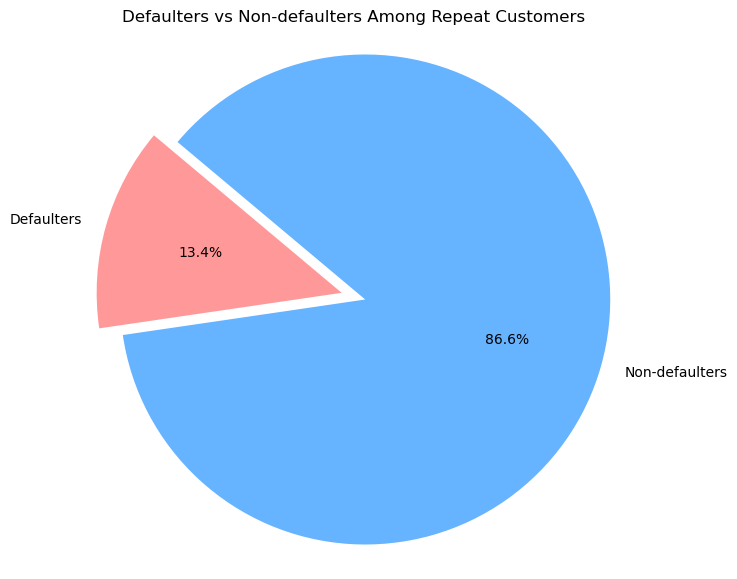

In [61]:
# Count how many repeat customers are defaulters
seg2_defaulted = seg2[seg2['LOAN_STATUS'] == 'defaulted']

# Pie chart: Defaulters vs non-defaulters among repeat customers
labels = ['Defaulters', 'Non-defaulters']
sizes = [seg2_defaulted.shape[0], seg2_total - seg2_defaulted.shape[0]]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the defaulter slice

# Plotting the pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Defaulters vs Non-defaulters Among Repeat Customers')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


##### Exhibit 4.2.3.4 How many defaults are registered by each loan term structure?

In [62]:
# Group by the loan term days and count the number of defaulters in each group for repeat customers
loan_term_defaults_seg2 = seg2[seg2['LOAN_STATUS'] == 'defaulted'].groupby('LOAN_TERM_DAYS').size()

# Calculate the total number of repeat users
total_repeat_users = seg2['USER_ID'].nunique()

# Calculate the percentage of defaults in each category with respect to total repeat users
defaults_percentage_seg2 = (loan_term_defaults_seg2 / total_repeat_users) * 100

# Print the result
print(defaults_percentage_seg2)


LOAN_TERM_DAYS
28     11.526657
56      1.809634
84      0.031935
112     0.030161
140     0.014193
168     0.015967
dtype: float64


###### Here it implies that even though majority defaults are still made in 28 days loan structure there rank is >1

In [68]:
seg2['CREDIT_SCORE'].describe()


count    56363.000000
mean         0.852970
std          0.039128
min          0.479100
25%          0.829700
50%          0.855600
75%          0.879200
max          0.968100
Name: CREDIT_SCORE, dtype: float64

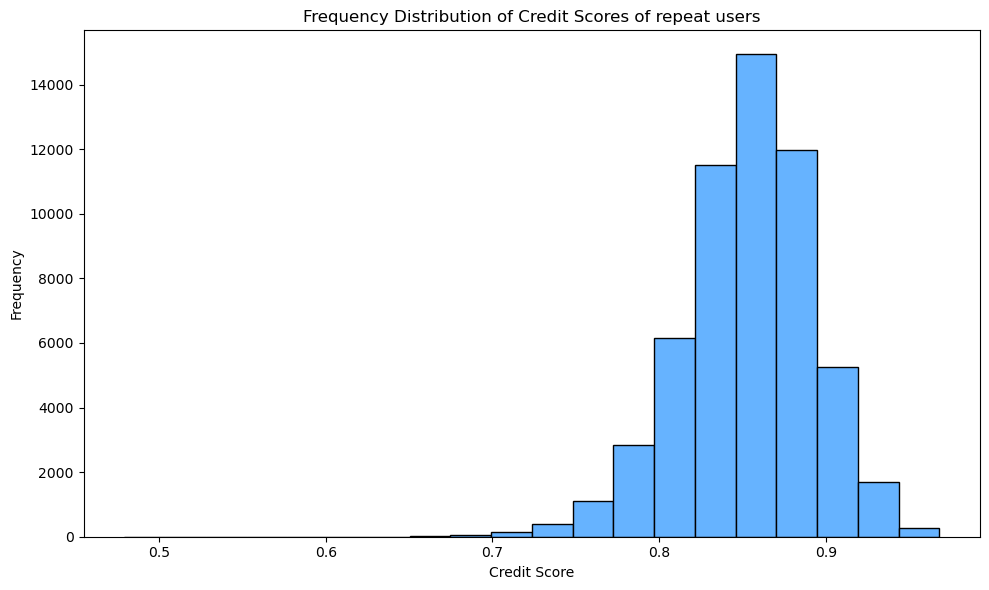

In [64]:
# Create a frequency distribution of the credit scores
plt.figure(figsize=(10,6))
plt.hist(seg2['CREDIT_SCORE'], bins=20, color='#66b3ff', edgecolor='black')

# Labeling the plot
plt.title('Frequency Distribution of Credit Scores of repeat users')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.tight_layout()

# Show the plot
plt.show()

In [70]:
seg2_defaulted['CREDIT_SCORE'].describe()

count    7569.000000
mean        0.841597
std         0.038967
min         0.667300
25%         0.818600
50%         0.845300
75%         0.868400
max         0.957200
Name: CREDIT_SCORE, dtype: float64

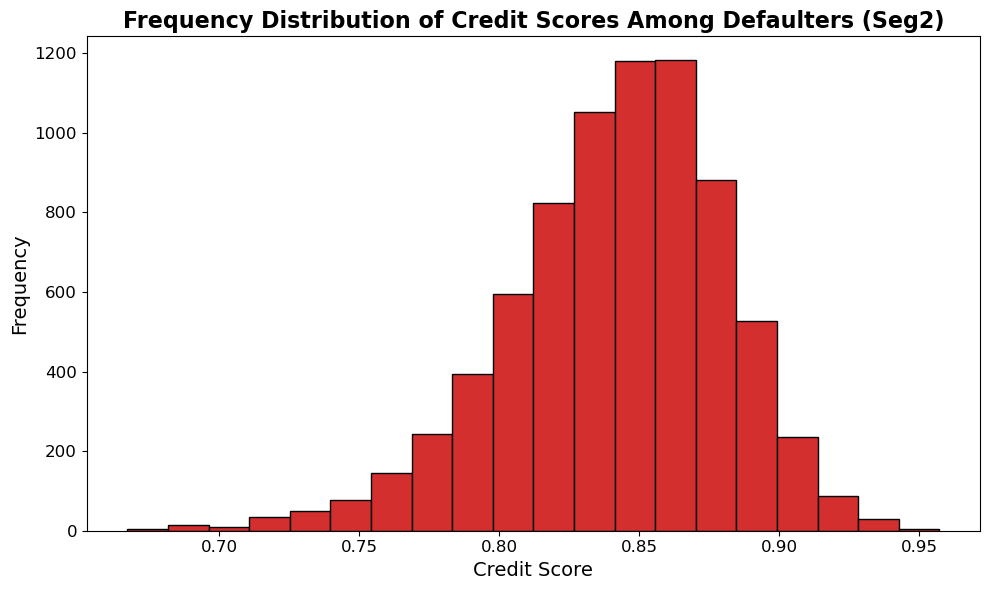

In [71]:
# Create a frequency distribution of the CREDIT_SCORE for defaulters
plt.figure(figsize=(10, 6))
plt.hist(seg2_defaulted['CREDIT_SCORE'], bins=20, color='#D32F2F', edgecolor='black')

# Labeling the plot
plt.title('Frequency Distribution of Credit Scores Among Defaulters (Seg2)', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the appearance of ticks and labels for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Apply a tight layout
plt.tight_layout()

# Show the plot
plt.show()

##### Exhibit 4.2.3.5 Q.what is the  credit history of onetime users who are defaulters ?

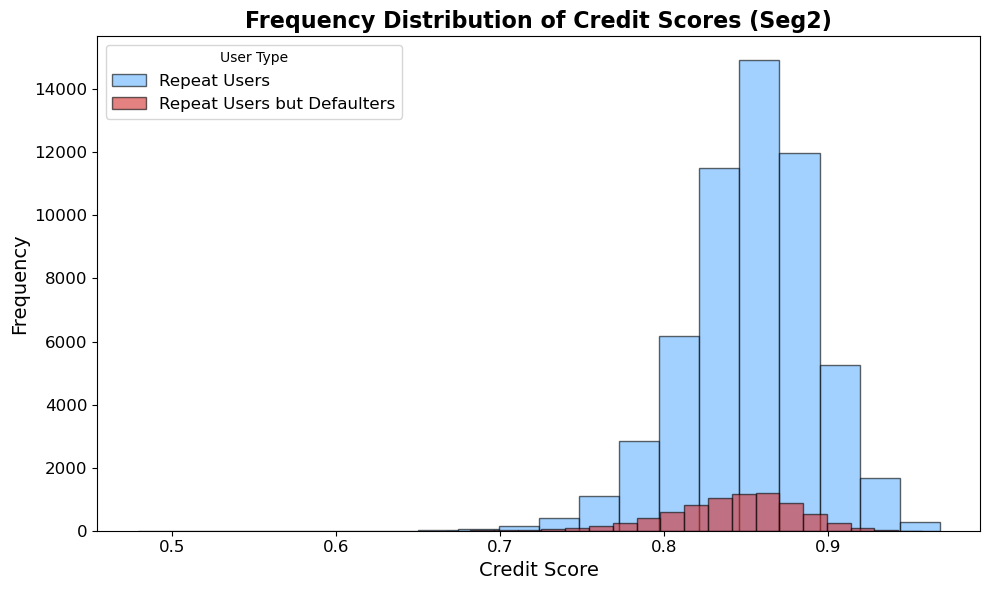

In [156]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the frequency distribution of the credit scores for repeat customers (seg2)
plt.hist(seg2['CREDIT_SCORE'], bins=20, color='#66b3ff', edgecolor='black', alpha=0.6, label='Repeat Users')

# Plot the frequency distribution of the credit scores for defaulters in seg2
defaulters_seg2_credit_scores = seg2[seg2['LOAN_STATUS'] == 'defaulted']['CREDIT_SCORE']
plt.hist(defaulters_seg2_credit_scores, bins=20, color='#D32F2F', edgecolor='black', alpha=0.6, label='Repeat Users but Defaulters')

# Labeling the plot
plt.title('Frequency Distribution of Credit Scores (Seg2)', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize the appearance of ticks and labels for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend to differentiate between the two categories
plt.legend(title='User Type', fontsize=12)

# Apply a tight layout
plt.tight_layout()

# Show the plot
plt.show()


##### Exhibit 4.2.3.6 Q How many of repeat users paid the loan on time ?


###### Excluding defaulted from the calculations

In [157]:
# Filter for repeat users who did not default
repeat_users_non_defaulted = seg2[(seg2['LOAN_STATUS'] != 'defaulted')]

# Check for repeat users who paid the loan on time (tenure of loan <= loan term days)
on_time_repeat_users = repeat_users_non_defaulted[repeat_users_non_defaulted['tenure of loan'] <= repeat_users_non_defaulted['LOAN_TERM_DAYS']]

# Calculate the number of repeat users
total_repeat_users = repeat_users_non_defaulted['USER_ID'].nunique()

# Calculate the number of repeat users who paid on time
on_time_repeat_users_count = on_time_repeat_users['USER_ID'].nunique()

# Calculate the percentage of repeat users who paid the loan on time
on_time_repeat_users_percentage = (on_time_repeat_users_count / total_repeat_users) * 100

# Print the result
print(f"Percentage of repeat users who paid the loan on time: {on_time_repeat_users_percentage:.2f}%")


Percentage of repeat users who paid the loan on time: 72.94%


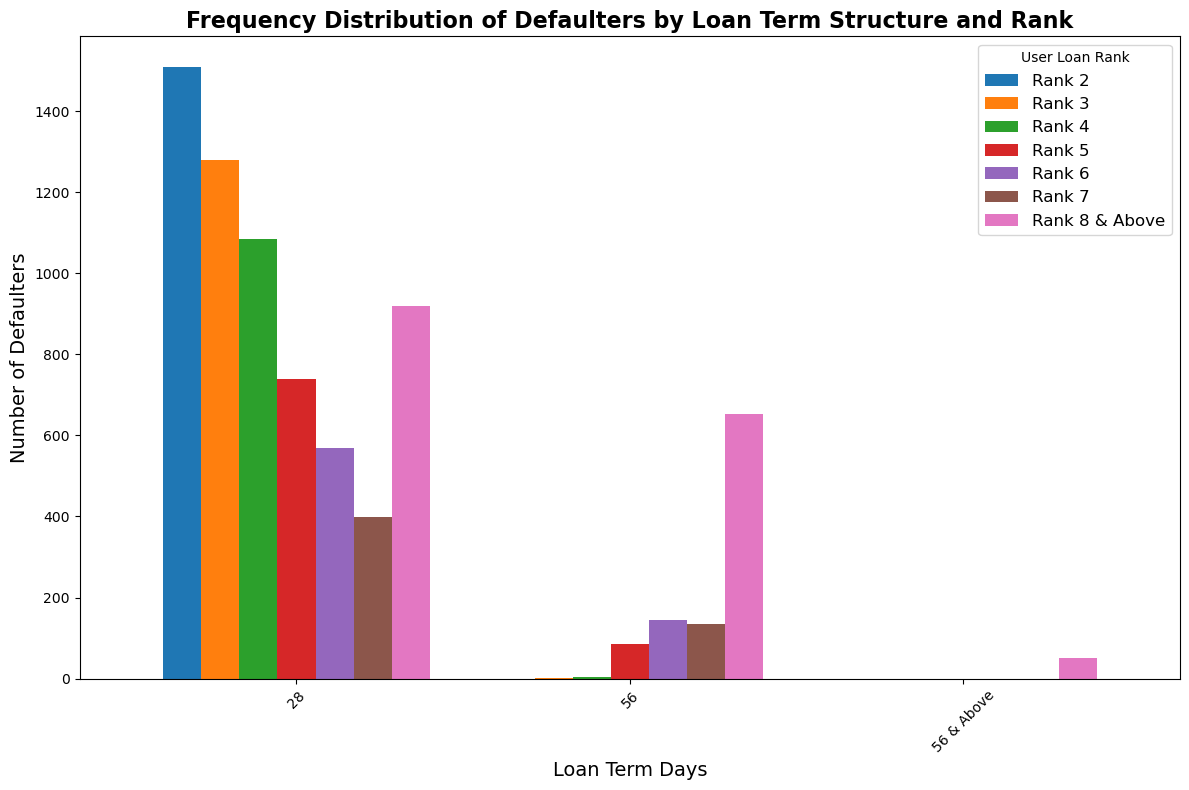

In [163]:
# Filter for repeat users who have defaulted
defaulters_seg2 = seg2[seg2['LOAN_STATUS'] == 'defaulted']

# Group by USER_LOAN_RANK and LOAN_TERM_DAYS, and count the number of defaulters in each group
default_count_by_rank_and_loan_term = defaulters_seg2.groupby(['USER_LOAN_RANK', 'LOAN_TERM_DAYS']).size().reset_index(name='defaulters_count')

# Create a new rank category for "Rank 8 & Above"
default_count_by_rank_and_loan_term['USER_LOAN_RANK'] = default_count_by_rank_and_loan_term['USER_LOAN_RANK'].apply(
    lambda x: 'Rank 8 & Above' if x > 7 else f'Rank {x}'
)

# Modify LOAN_TERM_DAYS to label days above 56 as '56 & Above'
default_count_by_rank_and_loan_term['LOAN_TERM_DAYS'] = default_count_by_rank_and_loan_term['LOAN_TERM_DAYS'].apply(
    lambda x: '56 & Above' if x > 56 else str(x)
)

# Group by LOAN_TERM_DAYS and USER_LOAN_RANK and sum the defaulters_count to handle duplicates
aggregated_data = default_count_by_rank_and_loan_term.groupby(['LOAN_TERM_DAYS', 'USER_LOAN_RANK'])['defaulters_count'].sum().unstack(fill_value=0)

# Plotting the bar graph
aggregated_data.plot(kind='bar', figsize=(12, 8), width=0.8)

# Labeling the plot
plt.title('Frequency Distribution of Defaulters by Loan Term Structure and Rank', fontsize=16, fontweight='bold')
plt.xlabel('Loan Term Days', fontsize=14)
plt.ylabel('Number of Defaulters', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='User Loan Rank', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()